In [ ]:
from plotnineseqsuite.data import seqs_dna #type: ignore
import pandas as pd

In [ ]:
from plotnine import ggplot #type: ignore
from plotnineseqsuite.logo import geom_logo #type: ignore
from plotnineseqsuite.theme import theme_seq #type: ignore

In [ ]:
import os

penta_path = '../penta_contexts'

penta_dict = {}
for filename in os.listdir(penta_path):
    if filename.startswith("S"):  # Ensure the file starts with a sample ID
        sample_id = filename.split('_')[0]  # Extract the sample ID (e.g., S1, S2)
        with open(os.path.join(penta_path, filename), 'r') as file:
            penta_dict[sample_id] = [line.strip() for line in file.readlines()]


In [ ]:
sample_map = pd.read_csv('../data/metadata/days_combined_sample_sheet.csv', sep=';')

In [5]:
sample_map

,sample_ID,clone,days_in_culture,E3_genotype,replicate
0,S1,R2,D0,sgAAVS1,A
1,S2,R2,D0,sgAAVS1,B
2,S3,R2,D0,sgAAVS1,C
3,S4,R2+219,D0,sgAAVS1,A
4,S5,R2+219,D0,sgAAVS1,B
...,...,...,...,...,...
66,S67,R2+219,D610,sgUBR5,B
67,S68,R2+219,D610,sgUBR5,C
68,S69,RA1,D610,sgUBR5,A
69,S70,RA1,D610,sgUBR5,B


In [6]:
clone = 'R2+219'

d610_c = sample_map.loc[(sample_map['days_in_culture'] == 'D610') & 
                        (sample_map['E3_genotype'] == 'sgAAVS1') &
                        (sample_map['clone'] == clone), 'sample_ID'].tolist()

d610_h = sample_map.loc[(sample_map['days_in_culture'] == 'D610') & 
                         (sample_map['E3_genotype'] == 'sgHUWE1') &
                        (sample_map['clone'] == clone), 'sample_ID'].tolist()

d610_u4 = sample_map.loc[(sample_map['days_in_culture'] == 'D610') & 
                         (sample_map['E3_genotype'] == 'sgUBR4') &
                        (sample_map['clone'] == clone), 'sample_ID'].tolist()

d610_u5 = sample_map.loc[(sample_map['days_in_culture'] == 'D610') & 
                         (sample_map['E3_genotype'] == 'sgUBR5') &
                        (sample_map['clone'] == clone), 'sample_ID'].tolist()

In [7]:
keys_to_merge = [d610_c, d610_h, d610_u4, d610_u5]
key_names = ['control', 'HUWE1', 'UBR4', 'UBR5']

control = []
for sample_id in d610_c:
    if sample_id in penta_dict:
        control.extend(penta_dict[sample_id])  # Use extend to merge lists into one
        print(f"Sample ID {sample_id} found in penta_dict.")

huwe1 = []
for sample_id in d610_h:
    if sample_id in penta_dict:
        huwe1.extend(penta_dict[sample_id])  # Use extend to merge lists into one
        print(f"Sample ID {sample_id} found in penta_dict.")

ubr4 = []
for sample_id in d610_u4:
    if sample_id in penta_dict:
        ubr4.extend(penta_dict[sample_id])  # Use extend to merge lists into one
        #print(f"Sample ID {sample_id} found in penta_dict.")

ubr5 = []
for sample_id in d610_u5:
    if sample_id in penta_dict:
        ubr5.extend(penta_dict[sample_id])  # Use extend to merge lists into one
        #print(f"Sample ID {sample_id} found in penta_dict.")

penta_by_genotype = {
    'control': control,
    'HUWE1': huwe1,
    'UBR4': ubr4,
    'UBR5': ubr5
}

Sample ID S39 found in penta_dict.
Sample ID S40 found in penta_dict.
Sample ID S41 found in penta_dict.
Sample ID S48 found in penta_dict.
Sample ID S49 found in penta_dict.
Sample ID S50 found in penta_dict.


In [8]:
#unbiased
control = ggplot() + geom_logo( penta_by_genotype['control'], method = 'probability' ) + theme_seq()
control.save(f'{clone}_penta_control.svg', dpi=300, width=8, height=4)

ubr4 = ggplot() + geom_logo( penta_by_genotype['UBR4'], method = 'probability' ) + theme_seq()
ubr4.save(f'{clone}_penta_ubr4.svg', dpi=300, width=8, height=4)

ubr5 = ggplot() + geom_logo( penta_by_genotype['UBR5'], method = 'probability' ) + theme_seq()
ubr5.save(f'{clone}_penta_ubr5.svg', dpi=300, width=8, height=4)

huwe1 = ggplot() + geom_logo( penta_by_genotype['HUWE1'], method = 'probability' ) + theme_seq()
huwe1.save(f'{clone}_penta_huwe1.svg', dpi=300, width=8, height=4)

/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 4 in image.
/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: R2+219_penta_control.svg
/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 4 in image.
/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: R2+219_penta_ubr4.svg
/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 4 in image.
/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: R2+219_penta_ubr5.svg
/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-

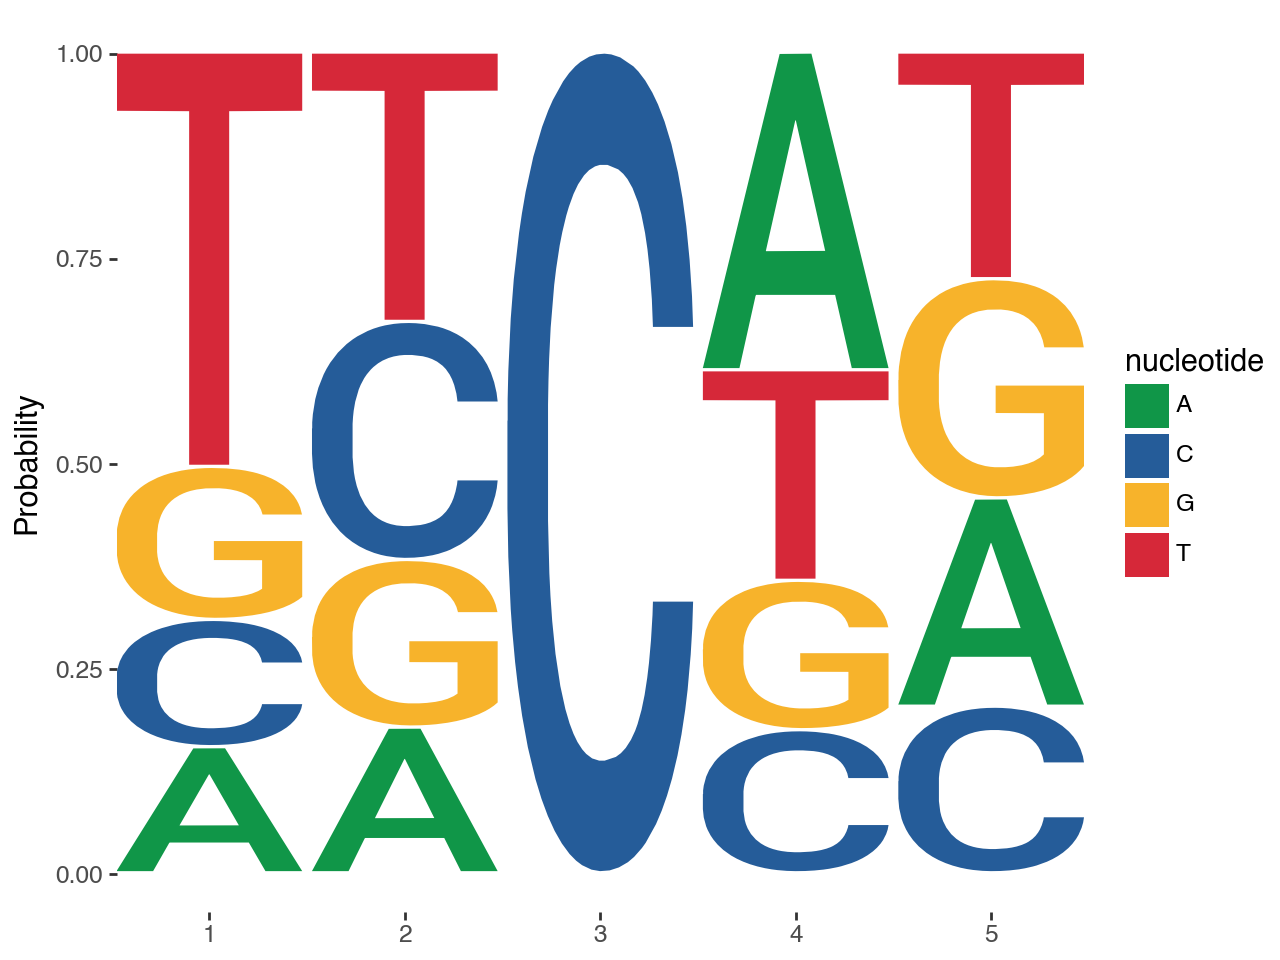

In [9]:
ggplot() + geom_logo( penta_by_genotype['control'], method = 'probability' ) + theme_seq()

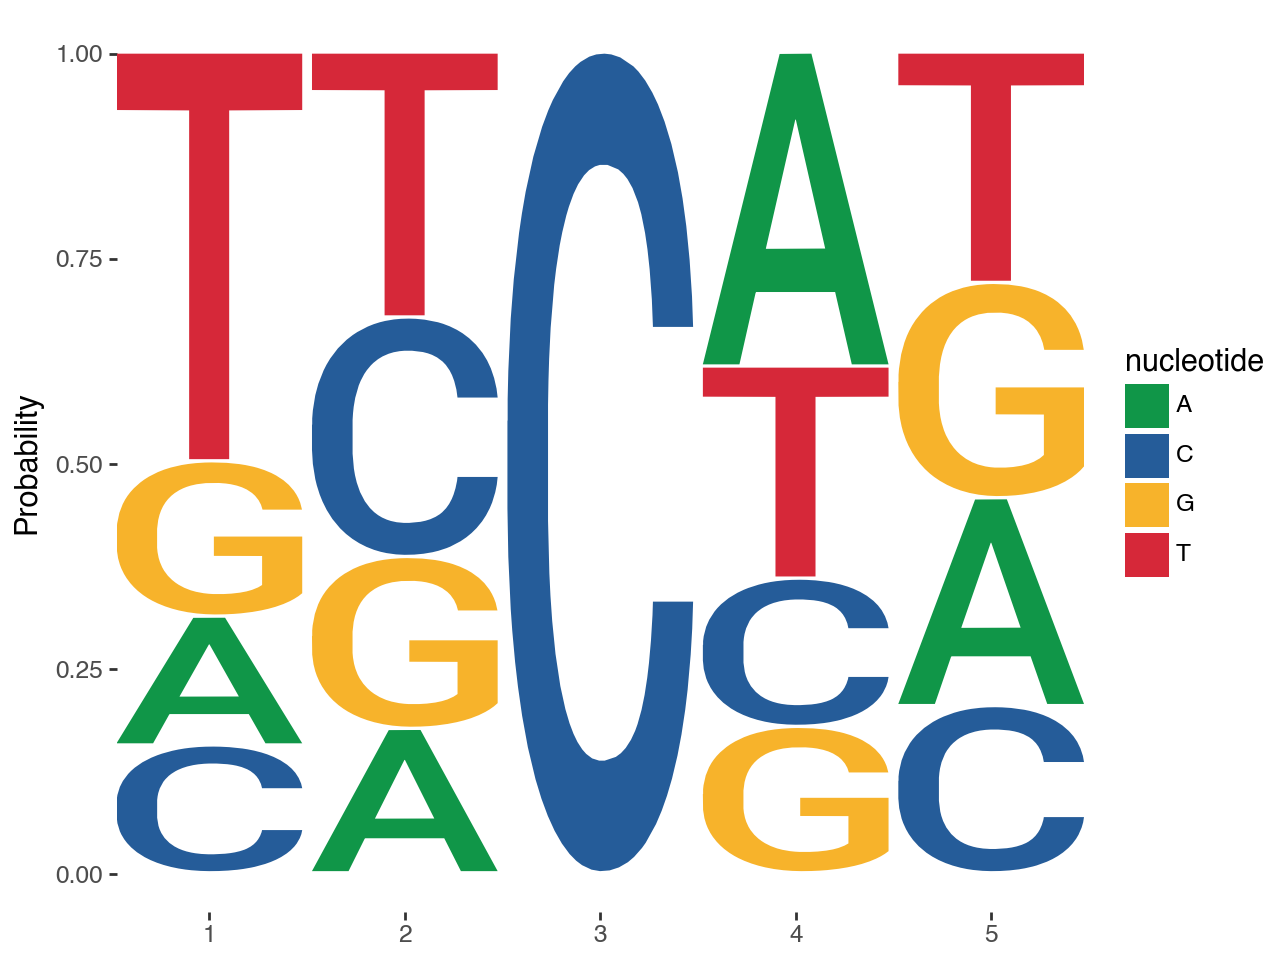

In [10]:
ggplot() + geom_logo( penta_by_genotype['HUWE1'], method = 'probability' ) + theme_seq()

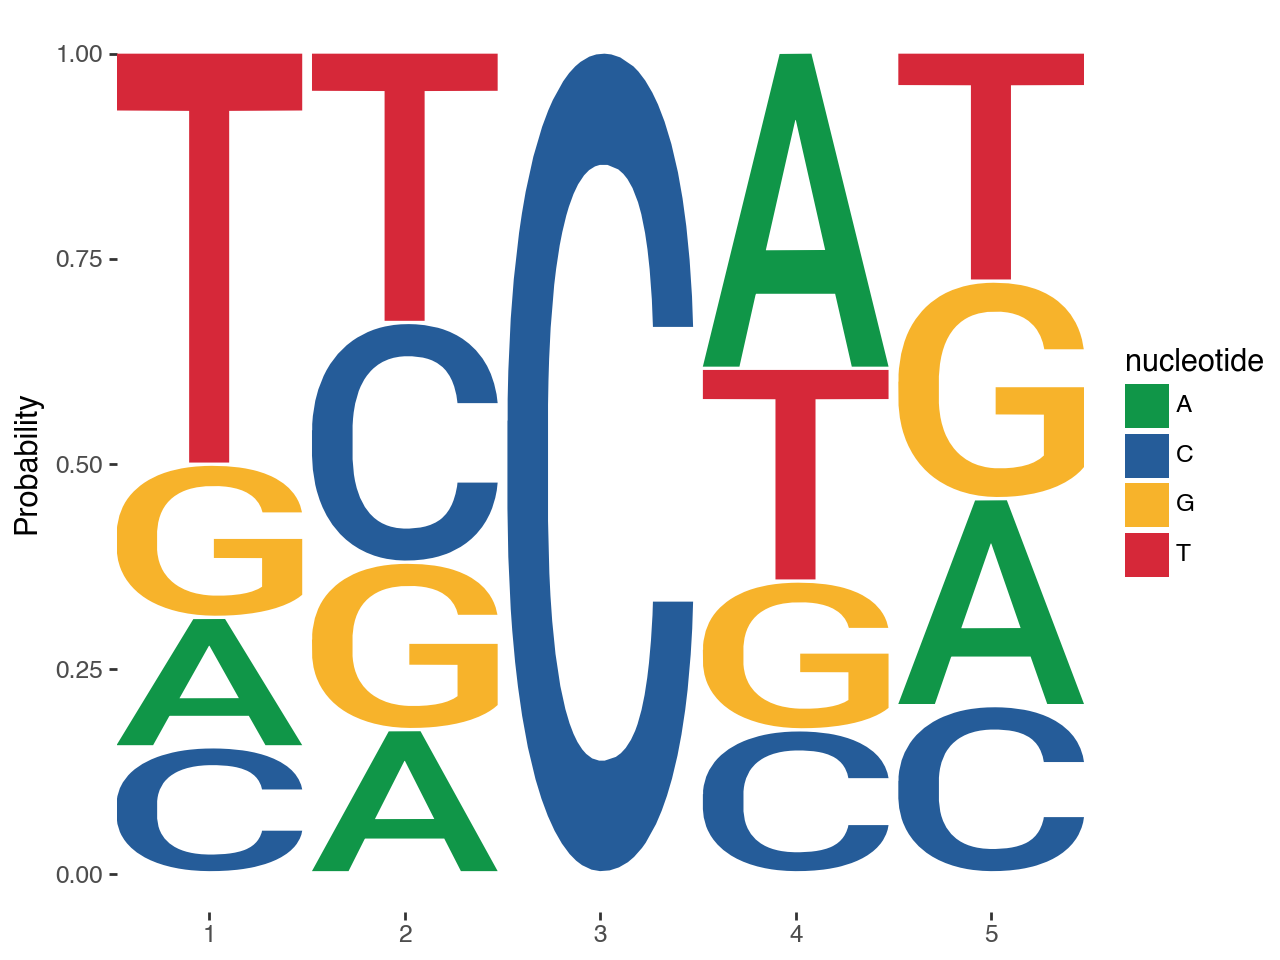

In [11]:
ggplot() + geom_logo( penta_by_genotype['UBR4'], method = 'probability' ) + theme_seq()

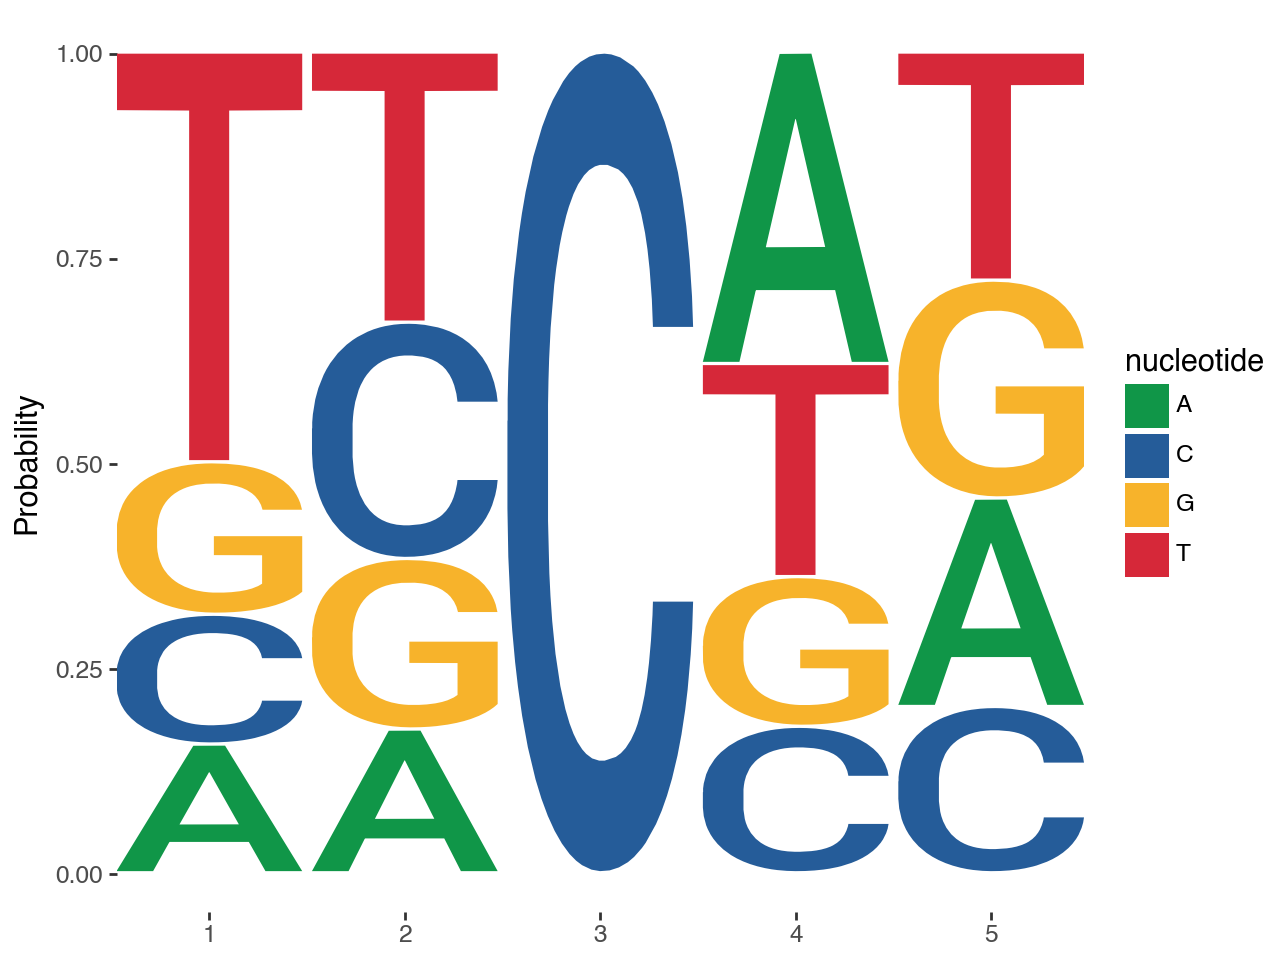

In [12]:
ggplot() + geom_logo( penta_by_genotype['UBR5'], method = 'probability' ) + theme_seq()

## filtering for NTCNN sequences

In [13]:
import re

penta_by_genotype
filtered_penta_by_genotype = {}

pattern = re.compile(r'^.TC..$')

for key, sequences in penta_by_genotype.items():
    filtered_penta_by_genotype[key] = [seq for seq in sequences if pattern.match(seq)]

In [14]:
#unbiased
control = ggplot() + geom_logo(filtered_penta_by_genotype['control'], method = 'probability' ) + theme_seq()
control.save(f'{clone}_NTCNN_control.svg', dpi=300, width=8, height=4)

ubr4 = ggplot() + geom_logo(filtered_penta_by_genotype['UBR4'], method = 'probability' ) + theme_seq()
ubr4.save(f'{clone}_NTCNN_ubr4.svg', dpi=300, width=8, height=4)

ubr5 = ggplot() + geom_logo(filtered_penta_by_genotype['UBR5'], method = 'probability' ) + theme_seq()
ubr5.save(f'{clone}_NTCNN_ubr5.svg', dpi=300, width=8, height=4)

huwe1 = ggplot() + geom_logo(filtered_penta_by_genotype['HUWE1'], method = 'probability' ) + theme_seq()
huwe1.save(f'{clone}_NTCNN_huwe1.svg', dpi=300, width=8, height=4)

/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 4 in image.
/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: R2+219_NTCNN_control.svg
/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 4 in image.
/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: R2+219_NTCNN_ubr4.svg
/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 4 in image.
/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: R2+219_NTCNN_ubr5.svg
/Users/mathilde/Desktop/projects/APOBEX/4_apobex/apobex/lib/python3.12/site-

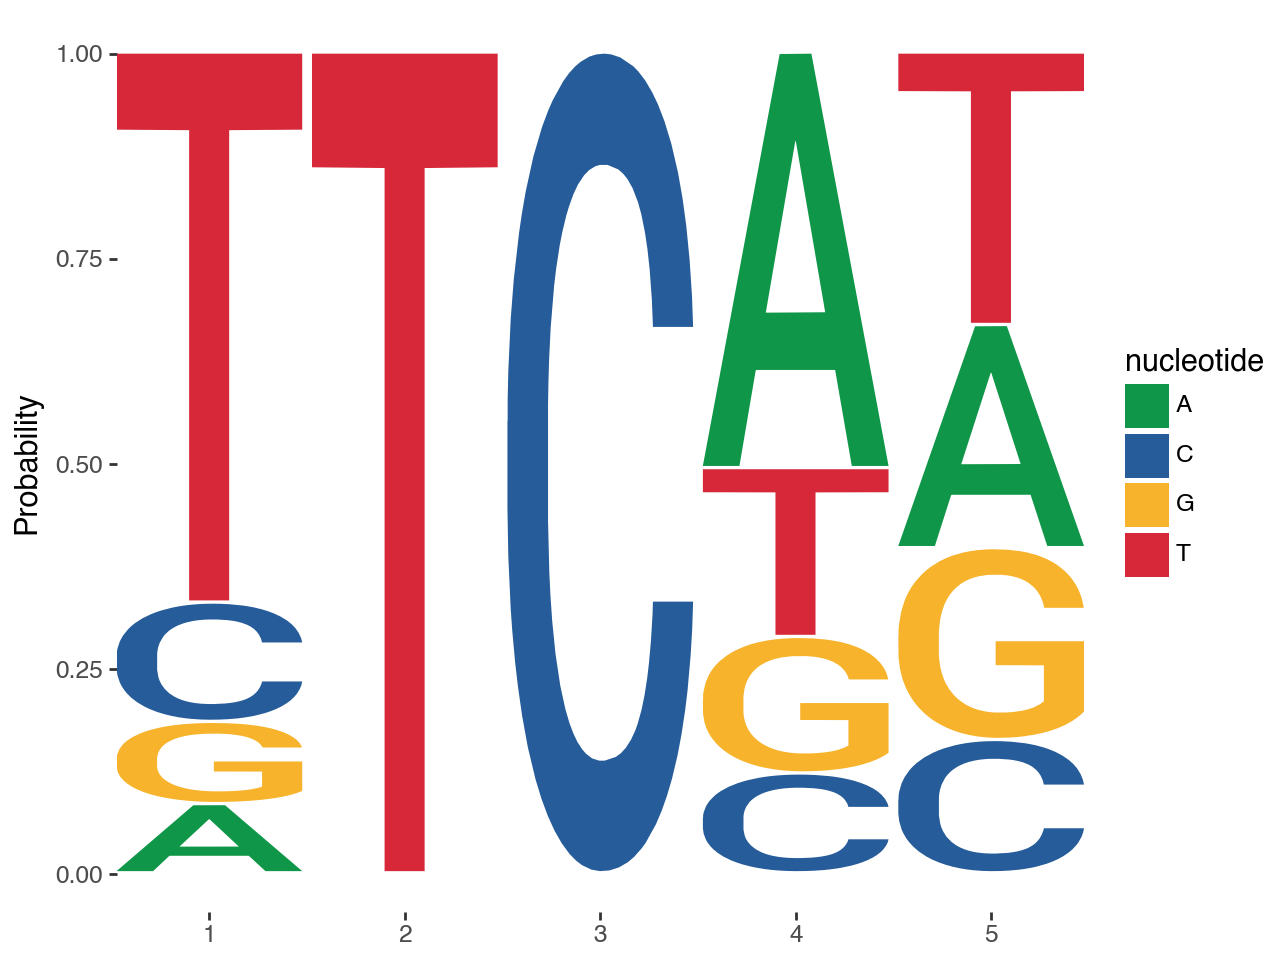

In [15]:
ggplot() + geom_logo(filtered_penta_by_genotype['control'], method = 'probability' ) + theme_seq()

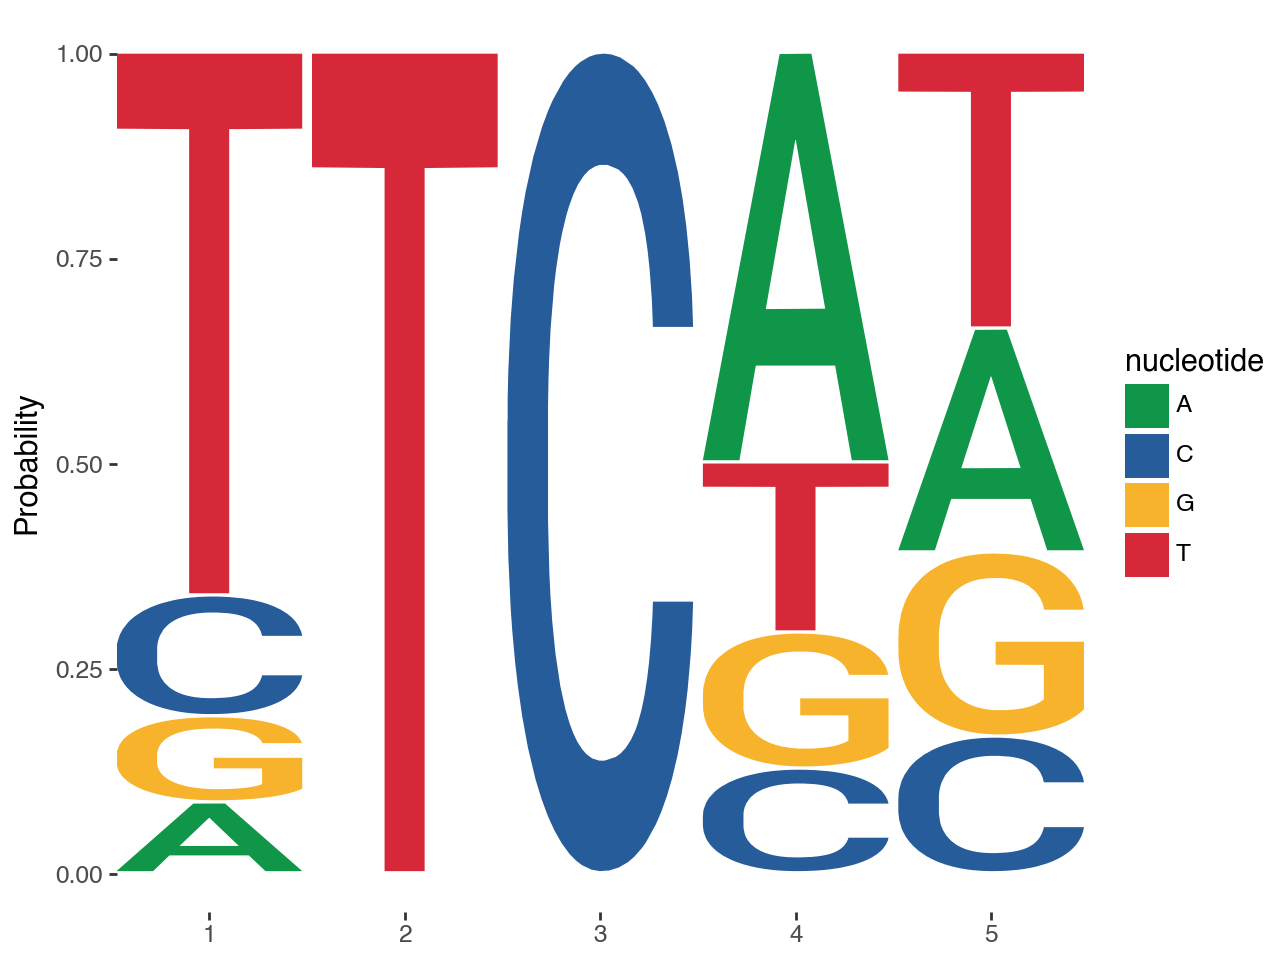

In [16]:
ggplot() + geom_logo(filtered_penta_by_genotype['HUWE1'], method = 'probability' ) + theme_seq()


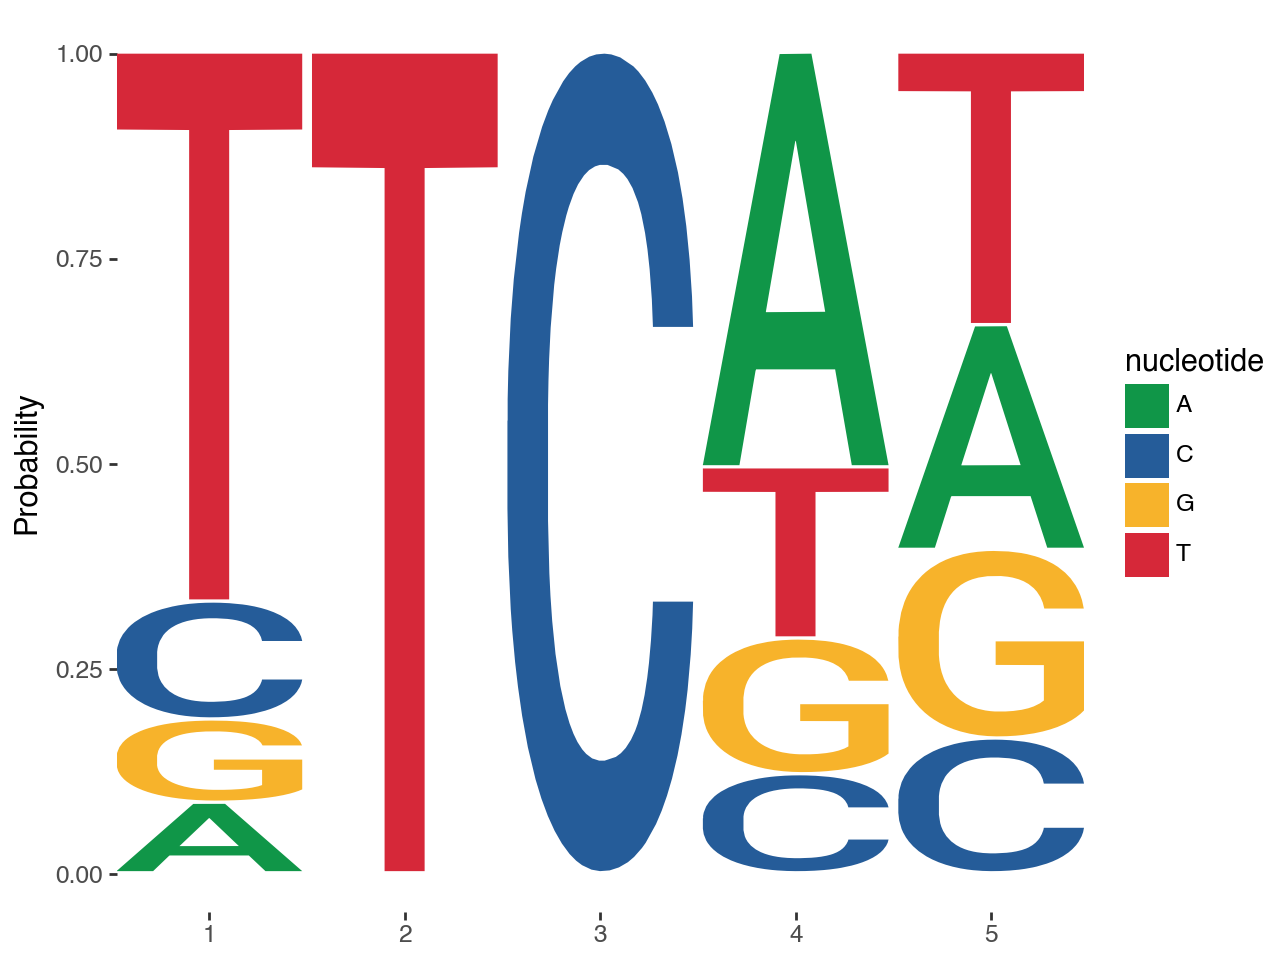

In [17]:
ggplot() + geom_logo(filtered_penta_by_genotype['UBR4'], method = 'probability' ) + theme_seq()

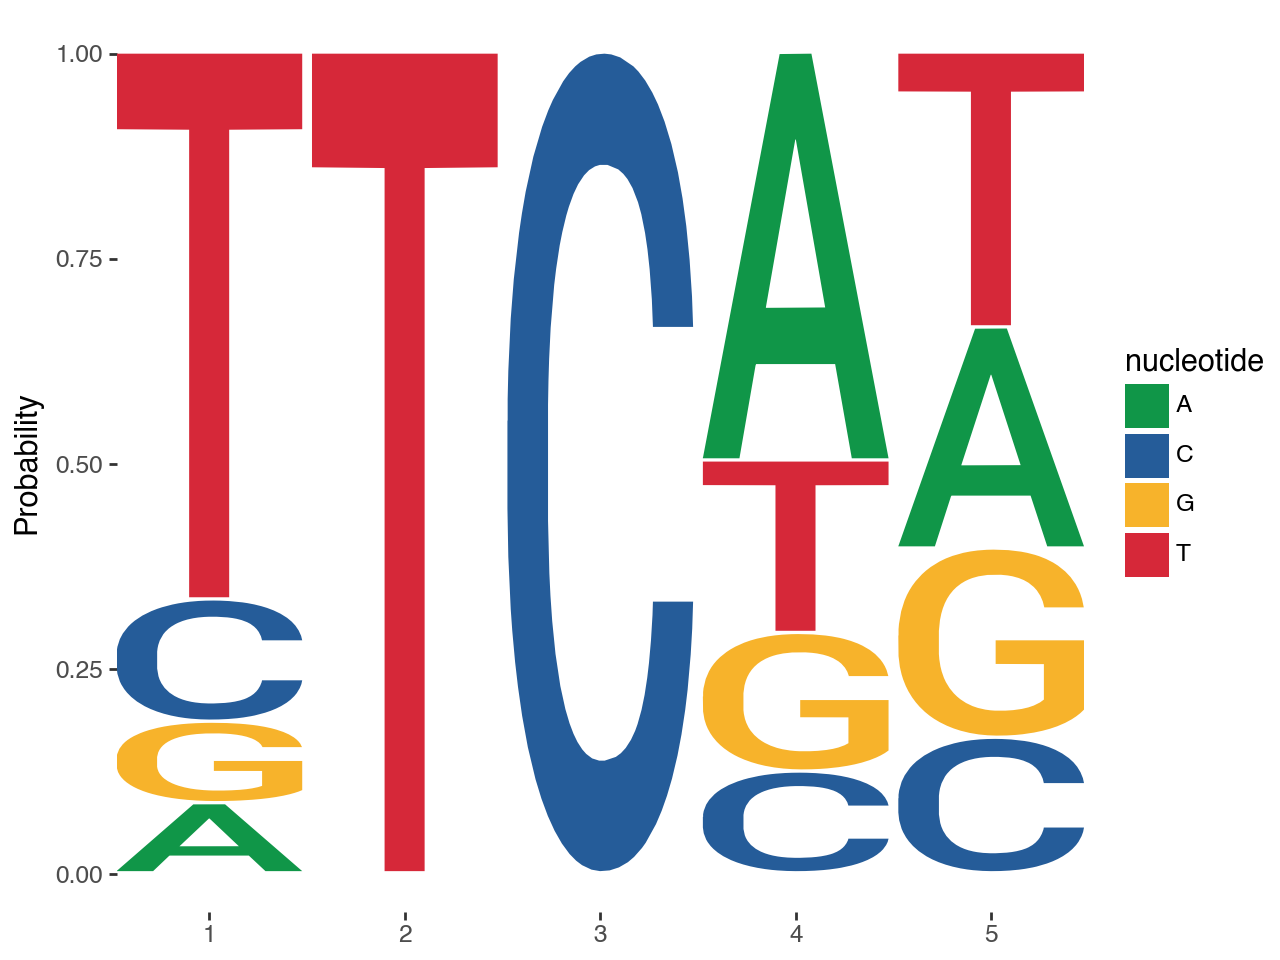

In [18]:
ggplot() + geom_logo(filtered_penta_by_genotype['UBR5'], method = 'probability' ) + theme_seq()